## Desafío entregable #8: Data Storytelling

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from statistics import median
from wordcloud import WordCloud

## 1. Introducción <a class="anchor" id="intro"></a>

La industria de la música no es ajena a la innovación tecnológica: la revolución digital y la masificación del acceso del internet cambiaron las reglas del juego. Los servicios de streamming de música y podcasts hoy son la norma. Spotify, YouTube Music, Tidal y otros, compiten por liderar el mercado en donde implementar soluciones tecnológicas les permite destacarse por sobre las demás. Estos servicios deben atraer clientes y mantenerlos interesados mediante el uso sencillo e intuitivo de sus sistemas, de forma que les premita acceder a sus artistas y canciones favoritas mientras descubren nuevos géneros y tendencias musicales. Para dicha tarea son cruciales los sistemas de clasificación y recomendación de canciones en función de los gustos y preferencias de los clientes. En este terreno los algoritmos de aprendizaje automático lucen toda su potencia.

En el presente trabajo analizaremos una selección de canciones del servicio Spotify, en concreto plantearemos diversas hipótesis sobre la factibilidad de elaborar un sistema de clasificación y recomendación de canciones. Para ello, se realizará un análisis exploratorio de los datos para dar respuestas a dichas hipótesis, evaluando si la aplicación de algoritmos de clasificación y de clustering nos permitirian cumplir nuestros objetivos.

## Índice

* [1. Introducción](#intro)
* [2. Primera inspección de los datos](#inspeccion)
* [3. Limpieza de los datos](#limpieza)
    * [3.1. Datos nulos](#nulos)
    * [3.2. Datos duplicados](#duplicados)
* [4. Popularidad](#popularidad)
    * [4.1. Géneros](#pop_generos)
    * [4.2. Artistas](#pop_artistas)
    * [4.3. Canciones](#pop_canciones)
* [5. Duración](#duracion)
* [6. Letras explícitas](#explicito)
* [7. Gráficos de cajas de las variables](#cajas)
* [8. Histogramas de frecuencias de las variables](#histogramas)
* [9. Correlaciones entre las variables](#correlaciones)
* [10. Conclusiones y cierre](#cierre)

## 2. Primera inspección de los datos <a class="anchor" id="inspeccion"></a>

In [2]:
df = pd.read_csv('Spotify_Track_Dataset.csv')

In [3]:
df.shape

(114000, 21)

In [4]:
df.head()

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [5]:
df.columns

Index(['Unnamed: 0', 'track_id', 'artists', 'album_name', 'track_name',
       'popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

El dataset está compuesto por una muestra de 114.000 canciones, la cual cada una de ellas es descripta por 21 variables. Entre dichas variables se encuentra el nombre de la canción, su intérprete, álbum, duración y una serie de parámetros numéricos que dan información sobre el volumen, la energía que transmite, el carácter instrumental, la presencia de palabra hablada o cantanda, entre otras. A continuación se describen algunas de las variables, principalmente aquellas de significados complejos.

- popularity: Popularidad de la canción, toma valores entre 0 y 100, siendo 100 el más popular. 
- explicit: Informa si la canción posee letras explícitas o no.
- danceability: Describe cuan bailable es una canción. 0 indica poco bailable y 1 indica muy bailable.
- energy: Es una medida de la intensidad. Canciones energéticas se sienten rápidas, de volumen alto y ruidosas.
- loudness: Volumen promedio de la canción en decibelios.
- speechiness: Detecta la presencia de palabra hablada. Mientras más palabra hablada posea, más cerca de 1 estará el valor.
- acousticness: Medida desde 0.0 a 1.0 sobre si la canción es acústica, indicando 1.0 que la canción es acústica.
- instrumentalness: Predice si la canción no contiene voces. Mientras más cerca esté de 1.0, mayor es la posibilidad que la canción no contenga voces.
- liveness: Detecta la presencia de audiencia en las canciones. Altos valores indican alta posibilidad de que el tema se interpretó en vivo.
- valence: Medida desde 0.0 a 1.0 describiendo la positividad musical que la canción porta. Canciones con alta valencia suenan más positivas, mientras la baja valencia indica temas más negativos.

## 3. Limpieza de los datos <a class="anchor" id="limpieza"></a>

### 3.1. Datos nulos <a class="anchor" id="nulos"></a>

In [6]:
df.isna().sum()

Unnamed: 0          0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [7]:
df = df.dropna()

### 3.2. Datos duplicados <a class="anchor" id="duplicados"></a>

In [8]:
df.sort_values(['popularity'], ascending = False).head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.0130,0.000005,0.266,0.238,131.121,4,dance
81051,81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.0130,0.000005,0.266,0.238,131.121,4,pop
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.0125,0.033000,0.230,0.550,128.033,4,hip-hop


In [9]:
df = df.drop_duplicates(subset = ['track_id'])
df.sort_values(['popularity'], ascending = False).head(3)

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,...,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
51664,51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,...,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
20008,20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,...,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,dance


## 4. Popularidad <a class="anchor" id="popularidad"></a>

In [10]:
df1 = df.copy()
df1.drop(['Unnamed: 0', 'track_id', 'mode', 'key', 'time_signature'], axis = 1, inplace = True)

df1[['artists', 'artist_1']] = df['artists'].str.split(';', 1, expand = True)
df1.drop('artist_1', axis = 1, inplace = True)

C:\Users\mauri\AppData\Local\Temp\ipykernel_13224\1787238175.py:4: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df1[['artists', 'artist_1']] = df['artists'].str.split(';', 1, expand = True)


### 4.1. Géneros <a class="anchor" id="pop_generos"></a>

In [11]:
print(df1['track_genre'].unique(), '\n')
print('Hay {} géneros en el dataset'.format(df['track_genre'].unique().size))

['acoustic' 'afrobeat' 'alt-rock' 'alternative' 'ambient' 'anime'
 'black-metal' 'bluegrass' 'blues' 'brazil' 'breakbeat' 'british'
 'cantopop' 'chicago-house' 'children' 'chill' 'classical' 'club' 'comedy'
 'country' 'dance' 'dancehall' 'death-metal' 'deep-house' 'detroit-techno'
 'disco' 'disney' 'drum-and-bass' 'dub' 'dubstep' 'edm' 'electro'
 'electronic' 'emo' 'folk' 'forro' 'french' 'funk' 'garage' 'german'
 'gospel' 'goth' 'grindcore' 'groove' 'grunge' 'guitar' 'happy'
 'hard-rock' 'hardcore' 'hardstyle' 'heavy-metal' 'hip-hop' 'honky-tonk'
 'house' 'idm' 'indian' 'indie-pop' 'indie' 'industrial' 'iranian'
 'j-dance' 'j-idol' 'j-pop' 'j-rock' 'jazz' 'k-pop' 'kids' 'latin'
 'latino' 'malay' 'mandopop' 'metal' 'metalcore' 'minimal-techno' 'mpb'
 'new-age' 'opera' 'pagode' 'party' 'piano' 'pop-film' 'pop' 'power-pop'
 'progressive-house' 'psych-rock' 'punk-rock' 'punk' 'r-n-b' 'reggae'
 'reggaeton' 'rock-n-roll' 'rock' 'rockabilly' 'romance' 'sad' 'salsa'
 'samba' 'sertanejo' 'show

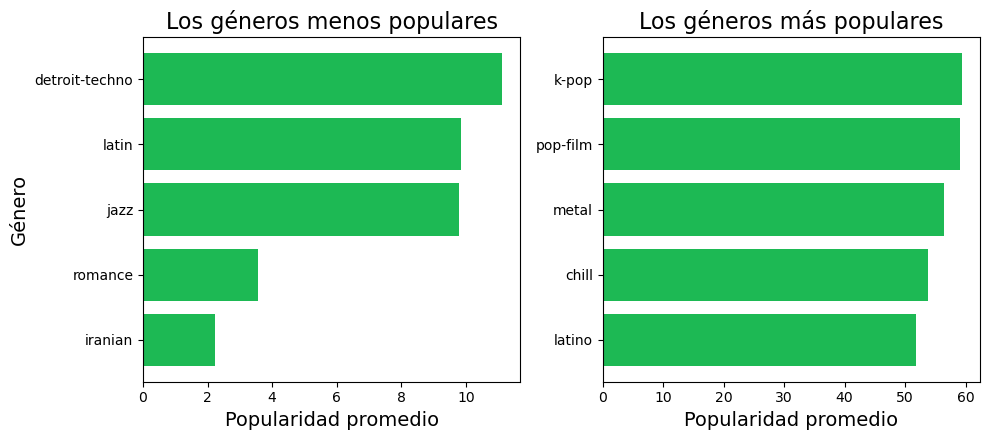

In [12]:
popularity_mean = df1['popularity'].groupby(df1['track_genre']).mean()
most_popular_genres = popularity_mean.sort_values(ascending = False).head(5)
least_popular_genres = popularity_mean.sort_values(ascending = False).tail(5)

fig, axs = plt.subplots(1, 2, figsize = (10, 4.5))

axs[0].barh(least_popular_genres.index[::-1], least_popular_genres[::-1], color = '#1DB954')
axs[1].barh(most_popular_genres.index[::-1], most_popular_genres[::-1], color = '#1DB954')

axs[0].set_xlabel('Popularidad promedio', fontsize = 14)
axs[1].set_xlabel('Popularidad promedio', fontsize = 14)
axs[0].set_ylabel('Popularidad promedio', fontsize = 14)
axs[0].set_ylabel('Género', fontsize = 14)
axs[0].set_title('Los géneros menos populares', fontsize = 16)
axs[1].set_title('Los géneros más populares', fontsize = 16)
plt.tight_layout()
plt.show()

### 4.2. Artistas <a class="anchor" id="pop_artistas"></a>

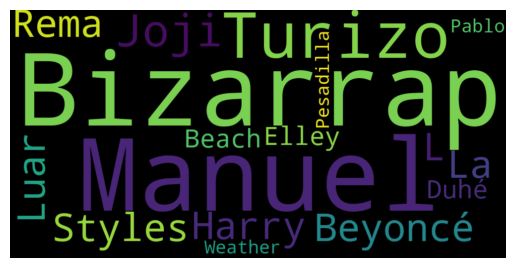

In [48]:
popular_artists = df1['popularity'].groupby(df1['artists']).mean()
most_popular_artists = popular_artists.sort_values(ascending = False).head(10)

text = list(most_popular_artists.index)

string=(" ").join(text)

wordcloud = WordCloud().generate(string)
wordcloud = WordCloud(width = 1000, height = 500).generate(string)

plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 4.3. Canciones <a class="anchor" id="pop_canciones"></a>

In [13]:
df2 = df1[['artists', 'album_name', 'popularity', 'track_genre']].sort_values(['popularity'], ascending = False).head(100)
df2.head(10)

,artists,album_name,popularity,track_genre
20001,Sam Smith,Unholy (feat. Kim Petras),100,dance
51664,Bizarrap,"Quevedo: Bzrp Music Sessions, Vol. 52",99,hip-hop
20008,David Guetta,I'm Good (Blue),98,dance
67356,Manuel Turizo,La Bachata,98,latin
67358,Bad Bunny,Un Verano Sin Ti,97,latin
67359,Bad Bunny,Un Verano Sin Ti,97,latin
67559,Bad Bunny,Un Verano Sin Ti,96,latin
20000,Chris Brown,Indigo (Extended),96,dance
79000,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,96,piano
81052,Harry Styles,As It Was,95,pop


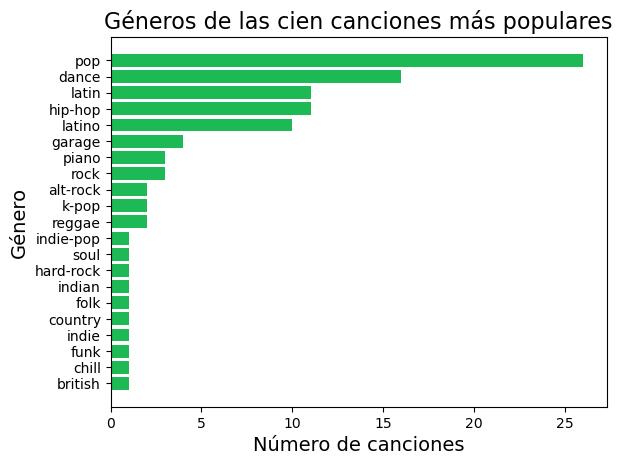

In [14]:
popular_songs_genre = df2['track_genre'].value_counts()

plt.barh(popular_songs_genre.index[::-1], popular_songs_genre[::-1], color = '#1DB954')
plt.xlabel('Número de canciones', fontsize = 14)
plt.ylabel('Género', fontsize = 14)
plt.title('Géneros de las cien canciones más populares', fontsize = 16)
plt.show()

## 5. Duración <a class="anchor" id="duracion"></a>

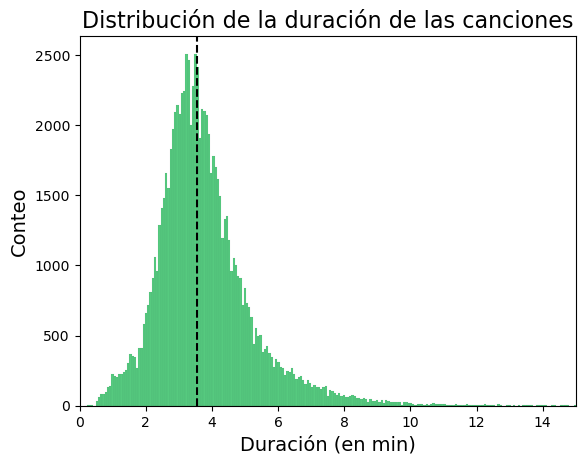

In [15]:
df1['duration_min'] = (df1['duration_ms']/(60 * 1000)).round(2)
df1.drop('duration_ms', axis = 1, inplace = True)

sns.histplot(df1['duration_min'], color = '#1DB954')
plt.axvline(median(df1['duration_min']), c = 'black', ls = '--')
plt.xlim(0, 15)
plt.xlabel('Duración (en min)', fontsize = 14) 
plt.ylabel('Conteo', fontsize = 14) 
plt.title('Distribución de la duración de las canciones', fontsize = 16)
plt.show()

La duración de las canciones presenta esta distribución, con una mediana en torno a los 3,6 minutos, aunque hay canciones que superan holgadamente los 15 minutos que abarca este gráfico.

## 6. Letras explicítas <a class="anchor" id="explicito"></a>

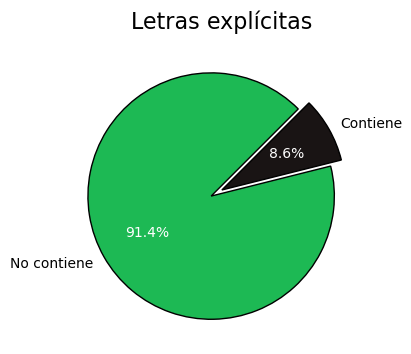

In [16]:
plt.figure(figsize = (4,4))
_, _, autotexts = plt.pie(df1.groupby('explicit').size(), labels = ('No contiene', 'Contiene'), explode = (0.1, 0), startangle = 45, autopct = '%1.1f%%', colors = ['#1DB954', '#191414'], wedgeprops = {"edgecolor" : "black", 'linewidth': 1})
for ins in autotexts:
    ins.set_color('white')

plt.title('Letras explícitas', fontsize = 16)
plt.show()

Se encuentra que el 8.6 % de las canciones poseen letras explíctas. Esta es otra variable a considerar, filtrar las canciones no explícitas de las explícitas es de utilidad para padres que buscan no exponer a sus hijos de corta edad a letras no aptas para menores.

## 7. Gráficos de cajas de las variables <a class="anchor" id="cajas"></a>

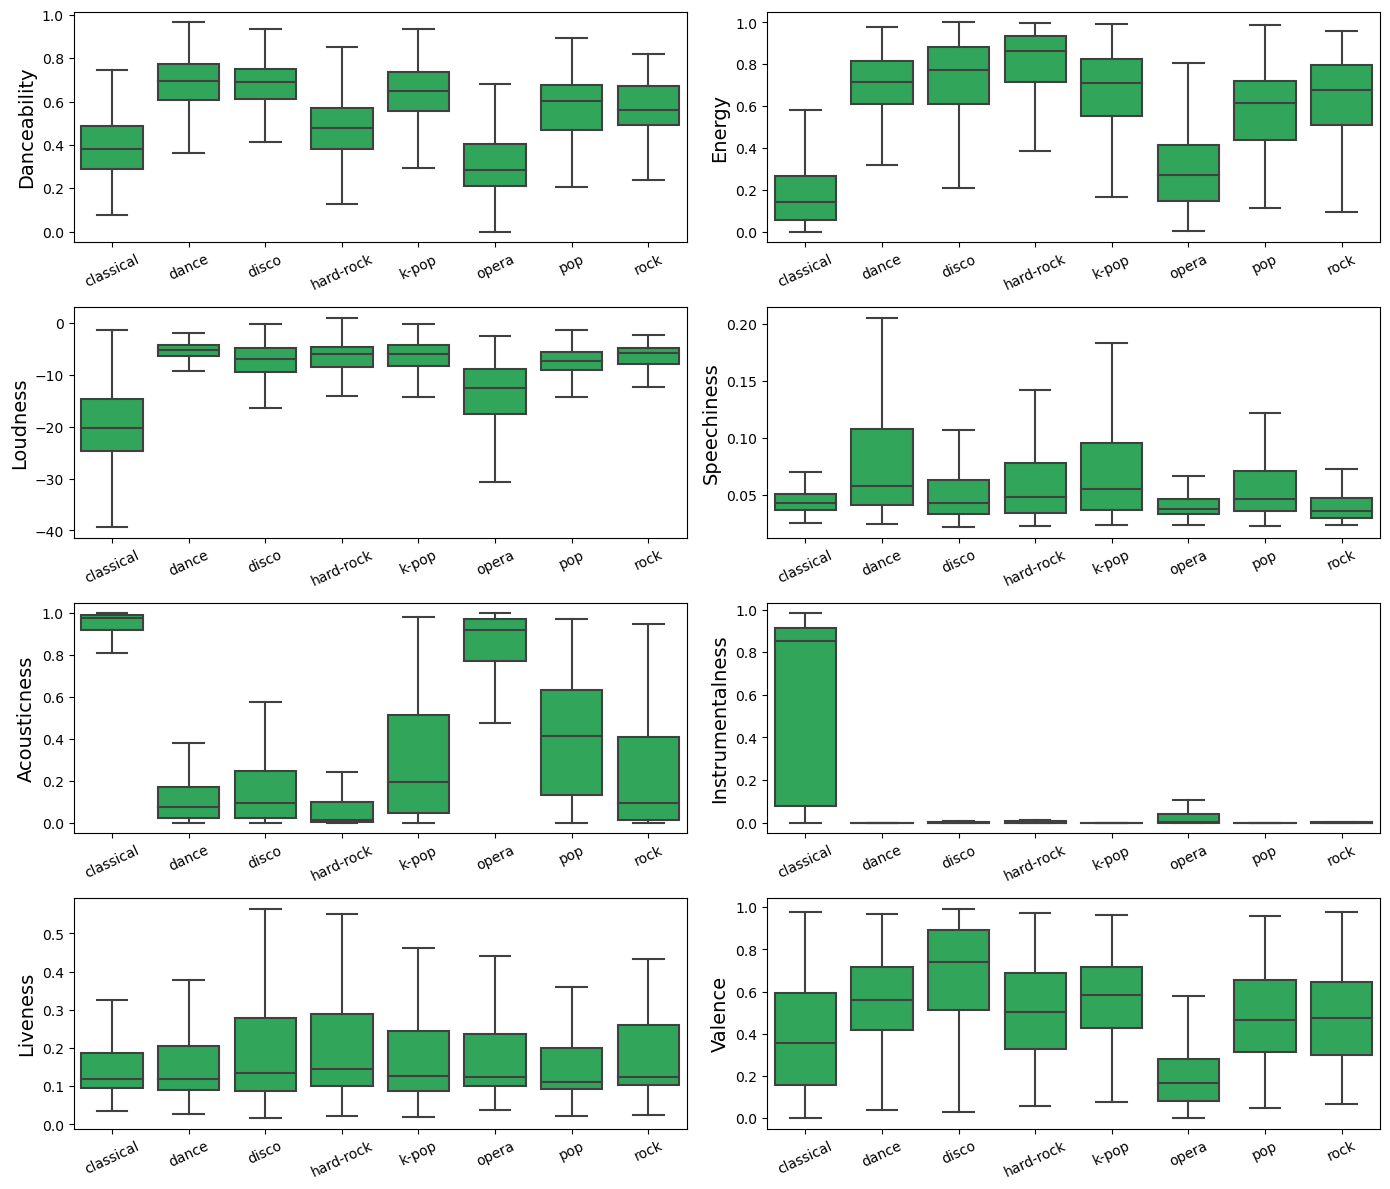

In [17]:
df_seleccion = df1[df1['track_genre'].isin(['classical', 'opera', 'rock', 'hard-rock', 'pop', 'k-pop', 'dance', 'disco'])]

columns = df_seleccion.columns[4:-3] # Selecciono los parámetros que considero más relevantes

l = [i for i in columns if i not in ['explicit', 'mode']]

plt.figure(figsize = (14, 12))
      
for x, column in zip(range(12), df_seleccion[l]):
    
    plt.subplot(int(len(l)/2), 2, x + 1)
    sns.boxplot(data = df_seleccion, y = column, x = df_seleccion['track_genre'], color = '#1DB954', showfliers = False) 
    # Filtro los outliers porque distorsionan los gráficos, dificultando apreciar las diferencias
    
    plt.xticks(rotation = 25)
    plt.xlabel("")
    plt.ylabel(l[x].capitalize(), fontsize = 14)
    
plt.tight_layout()

En estos gráficos de cajas se puede observar que los distintos géneros presentan diferencias sustanciales entre las variables, como se mencionó en la entrega anterior esto es el primer argumento para hacer emplear un algoritmo de clasificación para armar el sistema de recomendación de canciones. Por otro lado, si comparamos entre los pares "classical" - "opera", "dance" - "disco", "rock" - "hard-rock" y "pop" - "k-pop", notamos que presentan cierta similaritud por lo que factible que un cliente que escuche ópera posiblemente le guste escuchar música clásica. Esto permite que el sistema de recomendación tenga cierto márgen para ofrecer géneros nuevos pero similares a los que la audiencia ya escuche. 

## 8. Histogramas de frecuencias de las variables <a class="anchor" id="histogramas"></a>

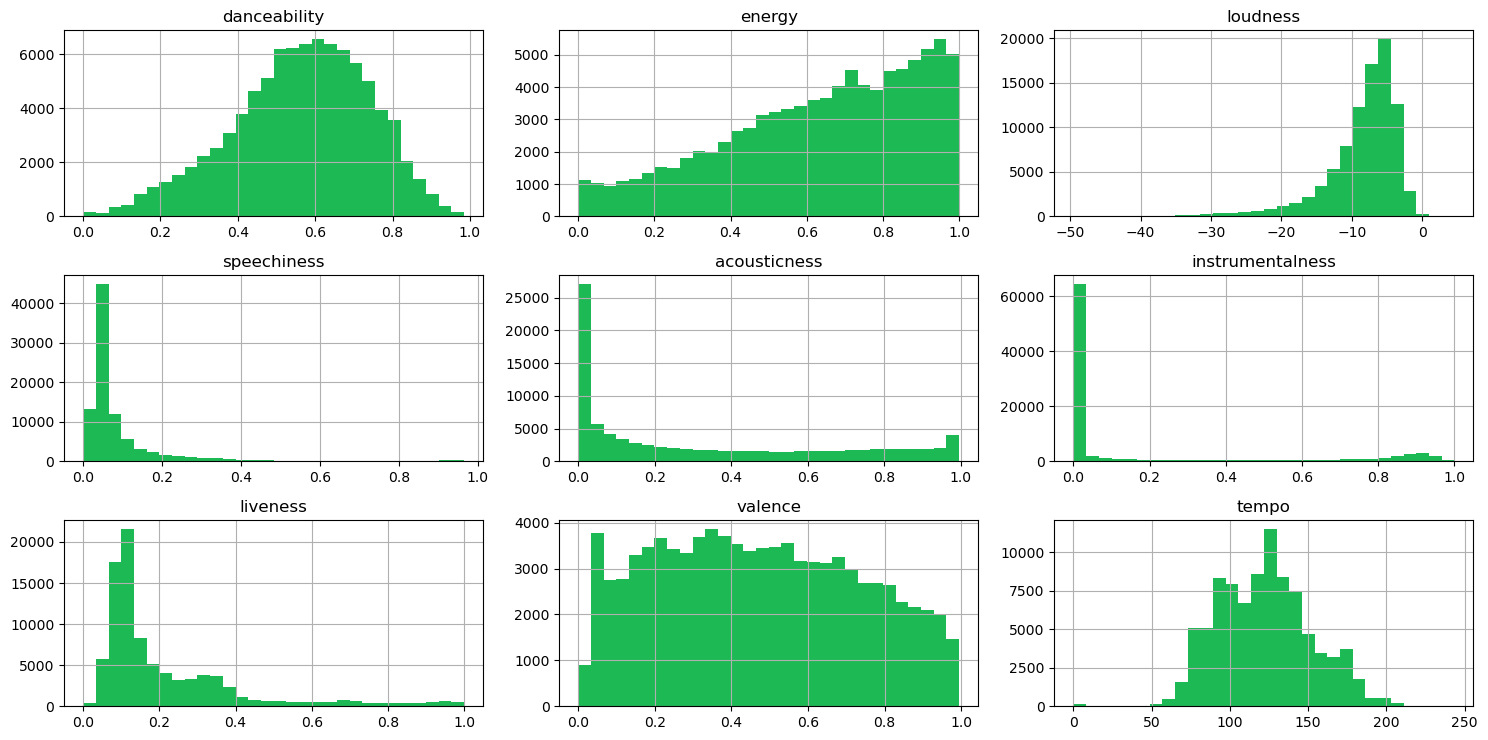

In [18]:
df1.iloc[:, 5:-1].hist(bins = 30, figsize = (15, 7.5), color = '#1DB954')
plt.tight_layout()
plt.show()

Los histogramas de las variables numéricas del dataset muestran un gran abanico de distribuciones, es por esto que deberá tenerse especial cuidado a la hora de plantear la estandarización de estos datos. Variables como "tempo" y "danceablility" ya tienen un comportamiento similar al normal o distribuciones similares a log-normal ("loudness", "liveness") y otras variables presentan valores discretos. Existen numerosos algoritmos de estandarización y habrá que estudiarlos y evaluarlos antes de proceder.

## 9. Correlaciones entre las variables <a class="anchor" id="correlaciones"></a>

C:\Users\mauri\AppData\Local\Temp\ipykernel_13224\2083988735.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df1.corr().round(1), vmin=-1, vmax=1, cmap = "Greens", cbar = True, annot = True)


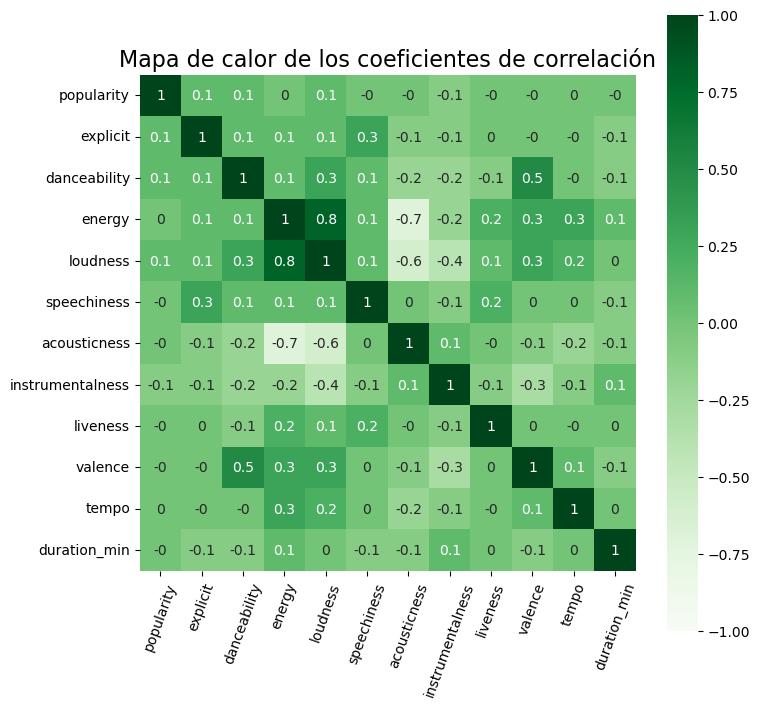

In [19]:
plt.figure(figsize = (8,8))
plt.axis('scaled')
sns.heatmap(df1.corr().round(1), vmin=-1, vmax=1, cmap = "Greens", cbar = True, annot = True)
plt.xticks(rotation = 70)
plt.title('Mapa de calor de los coeficientes de correlación', fontsize = 16)
plt.show()

## 10. Conclusiones y cierre <a class="anchor" id="cierre"></a>